In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Cargar el dataset procesado
data = pd.read_csv('data_evaluacion_processed.csv')

In [18]:
# Separar características y etiqueta
X = data.drop('salary', axis=1)
y = data['salary']

In [20]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

SVM with linear kernel Accuracy: 0.8109602129256808

SVM with linear kernel
Train Accuracy : 0.81485
Test Accuracy : 0.81096
Precisión del modelo: 0.8109602129256808


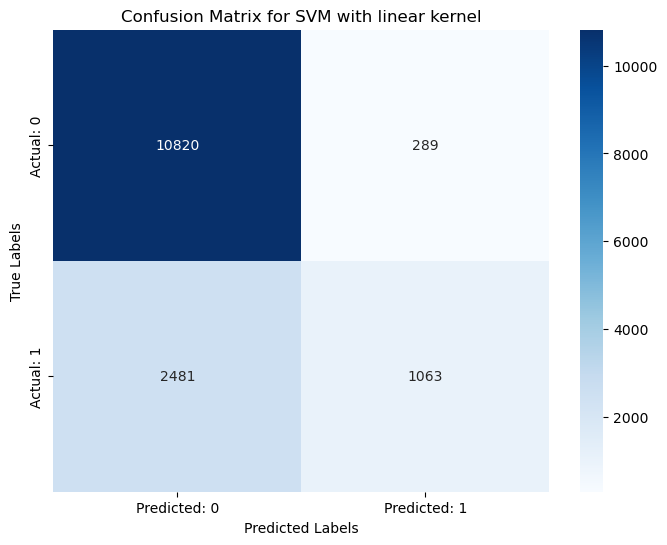

SVM with poly kernel Accuracy: 0.8414659114174572

SVM with poly kernel
Train Accuracy : 0.84866
Test Accuracy : 0.84147
Precisión del modelo: 0.8414659114174572


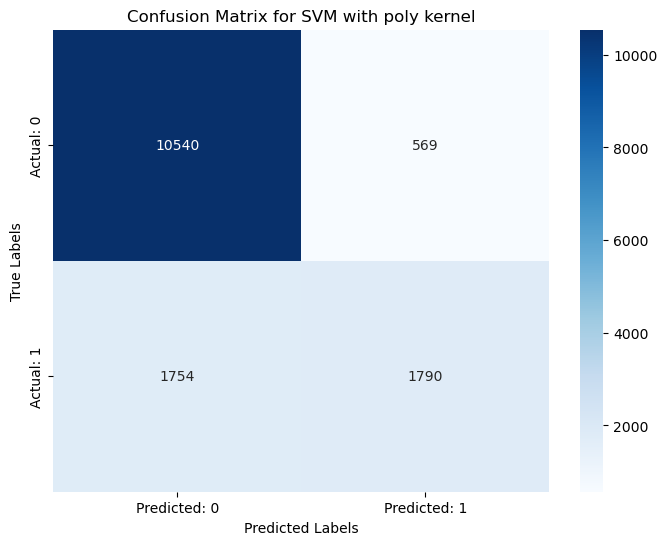

SVM with rbf kernel Accuracy: 0.8469255442571487

SVM with rbf kernel
Train Accuracy : 0.85735
Test Accuracy : 0.84693
Precisión del modelo: 0.8469255442571487


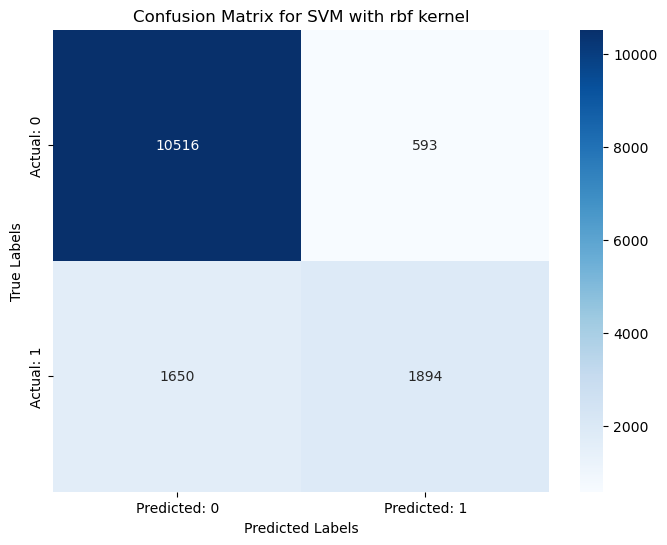

SVM with sigmoid kernel Accuracy: 0.7558179212447963

SVM with sigmoid kernel


In [ ]:
## Evaluar SVM con diferentes kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train_scaled, y_train)
    y_pred_svm = svm.predict(X_test_scaled)

# Mostrar precisión del modelo
    print(f'SVM with {kernel} kernel Accuracy: {accuracy_score(y_test, y_pred_svm)}')
    print(f'\nSVM with {kernel} kernel')
    print('Train Accuracy : %.5f' % svm.score(X_train_scaled, y_train))
    print('Test Accuracy : %.5f' % svm.score(X_test_scaled, y_test))
    print("Precisión del modelo:", accuracy_score(y_test, y_pred_svm))

# Calcular la matriz de confusión
    cm = confusion_matrix(y_test, y_pred_svm)
    
    # Visualizar la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted: 0', 'Predicted: 1'], 
                yticklabels=['Actual: 0', 'Actual: 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for SVM with {kernel} kernel')
    plt.show()